In [13]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
dataset = pd.read_csv("../Data/mortgage.csv")
dataset.head() 

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/28/19,Mortgage,Conventional home mortgage,Struggling to pay mortgage,None,"In dispute of the loan # XXXX, for XXXX XXXX t...",Company believes it acted appropriately as aut...,"SELECT PORTFOLIO SERVICING, INC.",GA,300XX,None,Consent provided,Web,03/28/19,Closed with explanation,Yes,NaN,3193709
1,02/21/19,Mortgage,FHA mortgage,Struggling to pay mortgage,None,My complaint is with Carrington Mortgage Servi...,None,"CARRINGTON MORTGAGE SERVICES, LLC",GA,312XX,None,Consent provided,Web,02/21/19,Closed with explanation,Yes,NaN,3158652
2,06/11/19,Mortgage,Home equity loan or line of credit (HELOC),Trouble during payment process,None,As of XX/XX/2019 PHH Mortgage Services purchas...,None,PHH Mortgage Services Corporation,FL,347XX,None,Consent provided,Web,06/11/19,Closed with explanation,Yes,NaN,3270600
3,11/29/19,Mortgage,Conventional home mortgage,Trouble during payment process,None,We started our mortgage with Loan Depot in XX/...,Company believes complaint is the result of an...,"LD Holdings Group, LLC",NJ,None,None,Consent provided,Web,11/29/19,Closed with monetary relief,Yes,NaN,3453669
4,10/23/19,Mortgage,Conventional home mortgage,Struggling to pay mortgage,None,"XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, XXXX ...",None,"Community Loan Servicing, LLC (formerly known ...",CA,92021,None,Consent provided,Web,11/05/19,Closed with explanation,Yes,NaN,3415392


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32805 entries, 0 to 32804
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 32805 non-null  object 
 1   Product                       32805 non-null  object 
 2   Sub-product                   32805 non-null  object 
 3   Issue                         32805 non-null  object 
 4   Sub-issue                     32805 non-null  object 
 5   Consumer complaint narrative  32805 non-null  object 
 6   Company public response       32805 non-null  object 
 7   Company                       32805 non-null  object 
 8   State                         32805 non-null  object 
 9   ZIP code                      32805 non-null  object 
 10  Tags                          32805 non-null  object 
 11  Consumer consent provided?    32805 non-null  object 
 12  Submitted via                 32805 non-null  object 
 13  D

In [4]:
dataset['Product'].value_counts()

Mortgage    32805
Name: Product, dtype: int64

In [5]:
len(dataset['Product'].value_counts())

1

In [6]:
dataset['Issue'].value_counts()

Incorrect information on your report                                                50667
Problem with a credit reporting company's investigation into an existing problem    32168
Attempts to collect debt not owed                                                   13099
Trouble during payment process                                                       5982
Improper use of your report                                                          5857
                                                                                    ...  
Incorrect exchange rate                                                                 6
Vehicle was damaged or destroyed the vehicle                                            5
Was approved for a loan, but didn't receive money                                       3
Property was sold                                                                       2
Problem with an overdraft                                                               1
Name: Issu

In [6]:
dataset = dataset.drop([ 'Issue', 'Sub-issue', 'Company public response', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID'], axis=1)

In [7]:
dataset.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company
0,03/28/19,Mortgage,Conventional home mortgage,"In dispute of the loan # XXXX, for XXXX XXXX t...","SELECT PORTFOLIO SERVICING, INC."
1,02/21/19,Mortgage,FHA mortgage,My complaint is with Carrington Mortgage Servi...,"CARRINGTON MORTGAGE SERVICES, LLC"
2,06/11/19,Mortgage,Home equity loan or line of credit (HELOC),As of XX/XX/2019 PHH Mortgage Services purchas...,PHH Mortgage Services Corporation
3,11/29/19,Mortgage,Conventional home mortgage,We started our mortgage with Loan Depot in XX/...,"LD Holdings Group, LLC"
4,10/23/19,Mortgage,Conventional home mortgage,"XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, XXXX ...","Community Loan Servicing, LLC (formerly known ..."


In [8]:
dataset['complaint_processed'] = \
dataset['Consumer complaint narrative'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
dataset['complaint_processed'] = \
dataset['complaint_processed'].map(lambda x: x.lower())

# Print out the first rows of dataset
dataset['complaint_processed'].head()

0    in dispute of the loan # xxxx for xxxx xxxx th...
1    my complaint is with carrington mortgage servi...
2    as of xx/xx/2019 phh mortgage services purchas...
3    we started our mortgage with loan depot in xx/...
4    xxxx xxxx xxxx xxxx xxxx xxxx xxxx xxxx xxxx x...
Name: complaint_processed, dtype: object

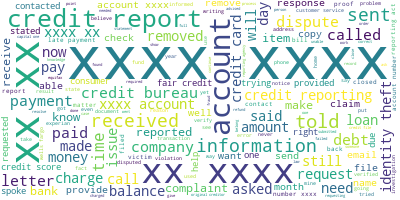

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(dataset['complaint_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [9]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'xxxx', 'xx'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = dataset['complaint_processed'].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 7), (1, 2), (2, 4), (3, 2), (4, 1), (5, 5), (6, 1), (7, 1), (8, 1), (9, 1), (10, 5), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [12]:
search_params = {'num_topics': [10, 15]}
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word)
model = GridSear  chCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)

[(0,
  '0.028*"loan" + 0.012*"mortgage" + 0.010*"would" + 0.009*"told" + '
  '0.008*"payment" + 0.008*"get" + 0.007*"call" + 0.006*"time" + '
  '0.006*"called" + 0.006*"back"'),
 (1,
  '0.019*"loan" + 0.017*"mortgage" + 0.013*"payment" + 0.011*"payments" + '
  '0.009*"account" + 0.007*"modification" + 0.007*"property" + 0.006*"would" + '
  '0.006*"company" + 0.006*"home"'),
 (2,
  '0.020*"payment" + 0.015*"mortgage" + 0.010*"account" + 0.010*"would" + '
  '0.008*"payments" + 0.008*"loan" + 0.007*"bank" + 0.007*"made" + '
  '0.007*"home" + 0.007*"received"'),
 (3,
  '0.014*"would" + 0.012*"loan" + 0.012*"payment" + 0.010*"told" + '
  '0.009*"payments" + 0.009*"mortgage" + 0.009*"time" + 0.008*"home" + '
  '0.007*"bank" + 0.007*"back"'),
 (4,
  '0.017*"loan" + 0.016*"mortgage" + 0.014*"would" + 0.012*"payment" + '
  '0.009*"closing" + 0.009*"escrow" + 0.008*"payments" + 0.008*"received" + '
  '0.007*"bank" + 0.007*"account"'),
 (5,
  '0.031*"mortgage" + 0.014*"insurance" + 0.013*"loan" +